In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
df = pd.read_csv("../data/raw/train.csv")

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dataset overview

In [18]:
print("Train shape:", df.shape)

Train shape: (891, 12)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Missing values per column

In [22]:
missing = df.isna().sum().sort_values(ascending=False)

missing_df = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": (missing / len(df) * 100).round(2)
})

missing_df[missing_df["missing_count"] > 0]

,missing_count,missing_pct
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


### Duplicates

In [23]:
df.duplicated().sum()

0

### Min/Max

In [24]:
df.select_dtypes(include=np.number).agg(["min", "max"]).T

,min,max
PassengerId,1.00,891.0000
Survived,0.00,1.0000
Pclass,1.00,3.0000
Age,0.42,80.0000
SibSp,0.00,8.0000
Parch,0.00,6.0000
Fare,0.00,512.3292


### Uniqe value count

In [25]:
df.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

### Survival vs sex

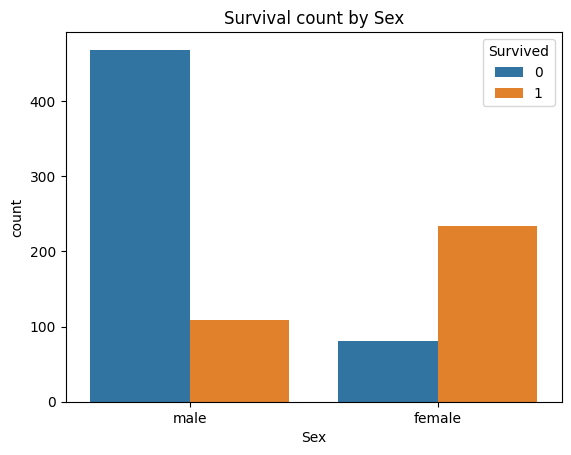

In [26]:
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival count by Sex")
plt.show()

Females show a higher survival rate compared to males.
Sex will be an important predictive feature.

### Survival vs Passenger class

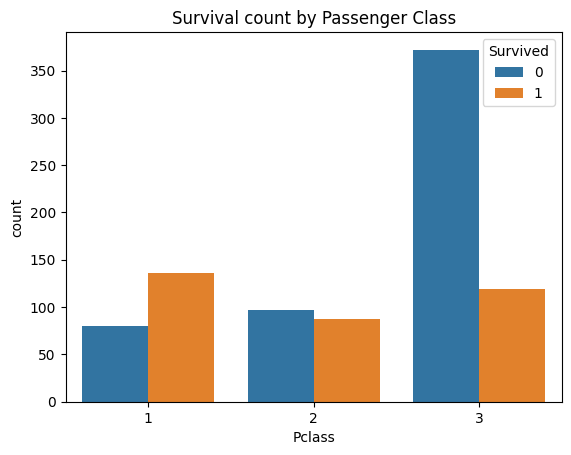

In [27]:
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival count by Passenger Class")
plt.show()

Higher class passengers had higher survival rates. Suggests that socio-economic status may have influenced survival outcomes.

### Age distribution

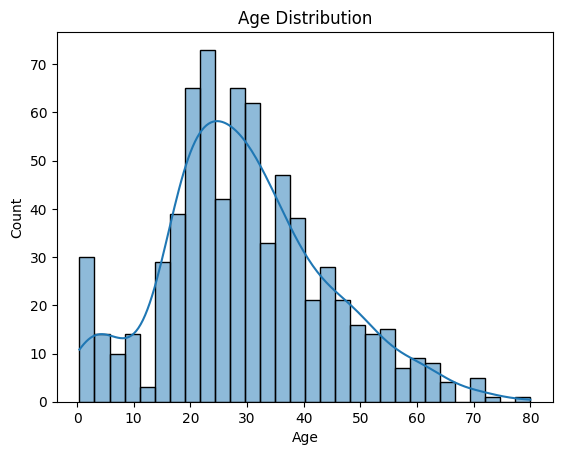

In [28]:
sns.histplot(data=df, x="Age", bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

The age distribution is skewed and contains missing values. Age imputation will likely be required during data cleaning.